In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pycbc.waveform import get_td_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.detector import Detector

from pycbc.filter import highpass
from pycbc.catalog import Merger

from pycbc.conversions import mass1_from_mchirp_q

%matplotlib inline

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [7]:
chirp_mass = 1.19
masses = mass1_from_mchirp_q(chirp_mass, 1)
masses

1.3669510424464717

In [4]:
merger = Merger("GW170817")
strain, stilde = {}, {}
for ifo in ['L1', 'H1']:
    # We'll download the data and select 256 seconds that includes the event time
    ts = merger.strain(ifo).time_slice(merger.time - 224, merger.time + 32)
    
    # Read the detector data and remove low frequency content
    strain[ifo] = highpass(ts, 15)

    # Remove time corrupted by the high pass filter
    strain[ifo] = strain[ifo].crop(4, 4)
    
    # Also create a frequency domain version of the data
    stilde[ifo] = strain[ifo].to_frequencyseries()

In [23]:
chirp_mass = 1.19
masses = mass1_from_mchirp_q(chirp_mass, 1)

#for apx in fd_approximants():

kwargs = {}
kwargs['mass1'] = masses
kwargs['mass2'] = masses
kwargs['f_lower'] = 20
kwargs['delta_t'] = stilde['H1'].delta_t
kwargs['approximant'] = "TaylorF2"
kwargs['inclination'] = np.pi/2.

'''hp, hc = get_td_waveform(approximant="TaylorF2",
                     mass1=masses,
                     mass2=masses,
                     f_lower=20, delta_t = stilde['H1'].delta_t)'''
hp, hc = get_td_waveform(**kwargs)

kwargs['inclination'] = 0.

hp1, hc1 = get_td_waveform(**kwargs)

kwargs['distance'] = 0.75

hp2, hc2 = get_td_waveform(**kwargs)


(-0.01, 0.01)

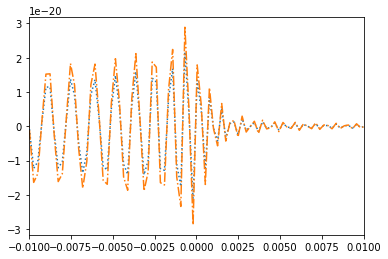

In [25]:
#plt.plot(hp.sample_times, hp)
plt.plot(hp1.sample_times, hp1, ls = ":")
plt.plot(hp2.sample_times, hp2, ls = "-.")
plt.xlim(-.01, 0.01)